Select calibrant:
1. CeO2
2. LaB6
3. YAG
4. alpha-Al2O3
5. Si
6. SiO2
7. TiO2
8. ZnO
9. ZrO2
CeO2
select colormap:
1. viridis
2. plasma
3. inferno
4. magma
5. cividis
6. Greys
7. Purples
8. Blues


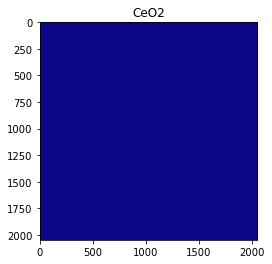

In [2]:
import pyFAI
import pyFAI.calibrant
import pyFAI.detectors
import numpy as np
import matplotlib.pyplot as plt
from pyFAI.gui import jupyter

# List of available calibrants
calibrants = ['CeO2', 'LaB6', 'YAG', "alpha-Al2O3", "Si", "SiO2", "TiO2", "ZnO", "ZrO2"]

# User input to select the calibrant
print("Select calibrant:")
for i, calibrant in enumerate(calibrants):
    print(f"{i+1}. {calibrant}")
selected_calibrant = int(input("Enter the number of the selected calibrant: ")) - 1
calibrant = calibrants[selected_calibrant]
print(calibrant)
cal = pyFAI.calibrant.ALL_CALIBRANTS(calibrant)


# User input for distance and wavelength
distance = float(input("Enter the distance (in m): "))
wavelength = float(input("Enter the wavelength (in e-10): "))

# Initialize the detector
dete = pyFAI.detectors.Perkin()
p1, p2, p3 = dete.calc_cartesian_positions()
poni1 = p1.mean()
poni2 = p2.mean()

# Initialize the azimuthal integrator
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
ai_short = AzimuthalIntegrator(dist= distance, poni1=poni1, poni2=poni2, detector=dete, wavelength=wavelength)

img = cal.fake_calibration_image(ai_short)
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues']
#User input to select the colormap
print("select colormap:")
for i, cmap in enumerate(cmaps):
    print(f"{i+1}. {cmap}")
selected_cmap = int(input("Enter the number of the selected colormap: ")) - 1
cmap = cmaps[selected_cmap]

plt.imshow(img, cmap=cmap)
plt.title(calibrant)
plt.show()


In [3]:
# Function form of the above code
import pyFAI
import pyFAI.calibrant
import numpy as np
import matplotlib.pyplot as plt
from pyFAI.gui import jupyter

def plot_calibration_image(distance, wavelength, cmap):
    """
    This function plots a calibration image for a given calibrant, distance, and wavelength.

    Parameters:
        calibrant (str): The name of the calibrant to use (e.g. 'Si', 'YAG').
        distance (float): The distance from the sample to the detector, in meters.
        wavelength (float): The wavelength of the x-rays, in 1e-10 meters.
    """
    calibrants = [
    "AgBh", "Al", "alpha_Al2O3", "Au", "C14H30O", "CeO2", "Cr2O3", 
    "cristobaltite", "CrOx", "CuO", "hydrocerussite", "LaB6", "LaB6_SRM660a", 
    "LaB6_SRM660b", "LaB6_SRM660c", "mock", "NaCl", "Ni", "PBBA", 
    "Pt", "quartz", "Si", "Si_SRM640", "Si_SRM640a", "Si_SRM640b", 
    "Si_SRM640c", "Si_SRM640d", "Si_SRM640e", "TiO2", "ZnO"
    ]
    
     # Retrieve the specified calibrant
    print("Select calibrant:")
    for i, calibrant in enumerate(calibrants):
        print(f"{i+1}. {calibrant}")
    selected_calibrant = int(input("Enter the number of the selected calibrant: ")) - 1
    calibrant = calibrants[selected_calibrant]
    print(calibrant)
    cal = pyFAI.calibrant.ALL_CALIBRANTS(calibrant)
    

    # Initialize the detector
    dete = pyFAI.detectors.Perkin()
    p1, p2, p3 = dete.calc_cartesian_positions()
    poni1 = p1.mean()
    poni2 = p2.mean()

    # Initialize the azimuthal integrator
    ai_short = AzimuthalIntegrator(dist=distance, poni1=poni1, poni2=poni2, detector=dete, wavelength=wavelength)

    # Generate the calibration image
    img = cal.fake_calibration_image(ai_short)

    # Plot the calibration image
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap)
    plt.title(calibrant)
    plt.show()


Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
NaCl


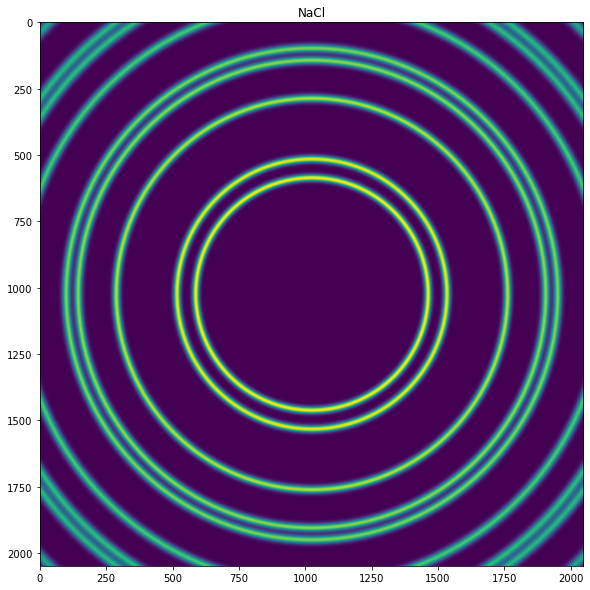

In [4]:
plot_calibration_image(0.4, 0.7e-10, 'viridis')

In [5]:
#Create a function to generate a 2D image of small spots on a detector image that's 2048x2048 pixels. Each spot is separated by a width and offset and has the highest intensity in the center of the spot and the 
#lowest intensity at the edges of the spot. The spots are 4x4 pixels in size. The function should take the number of spots, the width of the spots, and the offset between spots as parameters.

def generate_2D_image(nspots, width, offset, size=4, shape = 'square'):
    """
    This function generates a 2D image of small spots on a detector image that's 2048x2048 pixels. Each spot is separated by a width and offset and has the highest intensity in the center of the spot and the 
    lowest intensity at the edges of the spot. The spots are 4x4 pixels in size. The function should take the number of spots, the width of the spots, and the offset between spots as parameters.

    Parameters:
        nspots (int): The number of spots to generate.
        width (float): The width of the spots.
        offset (float): The offset between spots.
    """
    # initialize the detector image
    detector_image = np.zeros((2048, 2048))
    
    
    #generate the spot where the highest intensity is in the center of the spot and the lowest intensity is at the edges of the spot, the intensity values are specified by the user as a parameter
    #the spots at a higher intensity at the center of the image and a lower intensity at the edges of the image but still have a gaussian distribution within the spot. 
    #the spots can either be square or cricular in shape and this is specified by the user, the default is square. This will start as a for loop.
    for i in range(nspots):
        for j in range(nspots):
            if shape == 'square':
                x = i * offset
                y = j * offset
                for k in range(size):
                    for l in range(size):
                        if x + k < 2048 and y + l < 2048:
                            detector_image[x+k][y+l] = np.exp(-((k-size/2)**2 + (l-size/2)**2) / (2 * width**2))
                    
    # display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detector_image, cmap='viridis')
    plt.title("2D X-Ray Diffraction Image")
    plt.show()

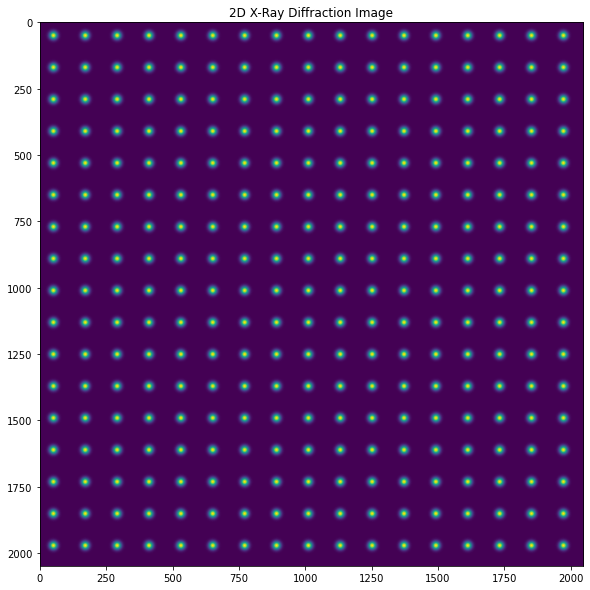

In [6]:
generate_2D_image(20,10,120, size = 100)

In [7]:
# Function form of the above code
import pyFAI
import pyFAI.calibrant
import numpy as np
import matplotlib.pyplot as plt
from pyFAI.gui import jupyter
import scipy.ndimage as ndimage
import pyFAI.detectors
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

def plot_calibration_image(distance, wavelength, cmap):
    """
    This function plots a calibration image for a given calibrant, distance, and wavelength.

    Parameters:
        calibrant (str): The name of the calibrant to use (e.g. 'Si', 'YAG').
        distance (float): The distance from the sample to the detector, in meters.
        wavelength (float): The wavelength of the x-rays, in 1e-10 meters.
    """
    calibrants = [
    "AgBh", "Al", "alpha_Al2O3", "Au", "C14H30O", "CeO2", "Cr2O3", 
    "cristobaltite", "CrOx", "CuO", "hydrocerussite", "LaB6", "LaB6_SRM660a", 
    "LaB6_SRM660b", "LaB6_SRM660c", "mock", "NaCl", "Ni", "PBBA", 
    "Pt", "quartz", "Si", "Si_SRM640", "Si_SRM640a", "Si_SRM640b", 
    "Si_SRM640c", "Si_SRM640d", "Si_SRM640e", "TiO2", "ZnO"
    ]
    
     # Retrieve the specified calibrant
    print("Select calibrant:")
    for i, calibrant in enumerate(calibrants):
        print(f"{i+1}. {calibrant}")
    selected_calibrant = int(input("Enter the number of the selected calibrant: ")) - 1
    calibrant = calibrants[selected_calibrant]
    print(calibrant)
    cal = pyFAI.calibrant.ALL_CALIBRANTS(calibrant)
    

    # Initialize the detector
    dete = pyFAI.detectors.Perkin()
    p1, p2, p3 = dete.calc_cartesian_positions()
    poni1 = p1.mean()
    poni2 = p2.mean()

    # Initialize the azimuthal integrator
    ai_short = AzimuthalIntegrator(dist=distance, poni1=poni1, poni2=poni2, detector=dete, wavelength=wavelength)

    # Generate the calibration image
    img = cal.fake_calibration_image(ai_short)

    # Plot the calibration image
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap)
    plt.title(calibrant)
    plt.show()
    
    return img
    

def generate_2D_image(nspots, width, offset, size=4, shape = 'square', cmap = 'viridis'):
    """
    This function generates a 2D image of small spots on a detector image that's 2048x2048 pixels. Each spot is separated by a width and offset and has the highest intensity in the center of the spot and the 
    lowest intensity at the edges of the spot. The spots are 4x4 pixels in size. The function should take the number of spots, the width of the spots, and the offset between spots as parameters.

    Parameters:
        nspots (int): The number of spots to generate.
        width (float): The width of the spots.
        offset (float): The offset between spots.
    """
    # initialize the detector image
    detector_image = np.zeros((2048, 2048))
    
    
    #generate the spot where the highest intensity is in the center of the spot and the lowest intensity is at the edges of the spot, the intensity values are specified by the user as a parameter
    #the spots at a higher intensity at the center of the image and a lower intensity at the edges of the image but still have a gaussian distribution within the spot. 
    #the spots can either be square or cricular in shape and this is specified by the user, the default is square. This will start as a for loop.
    for i in range(nspots):
        for j in range(nspots):
            if shape == 'square':
                x = i * offset
                y = j * offset
                for k in range(size):
                    for l in range(size):
                        if x + k < 2048 and y + l < 2048:
                            detector_image[x+k][y+l] = np.exp(-((k-size/2)**2 + (l-size/2)**2) / (2 * width**2))
                    
    # display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detector_image, cmap=cmap)
    plt.title("2D X-Ray Diffraction Image")
    plt.show()
    
    return detector_image


def rotate_image(image, angle, cmap = 'viridis'):
    """
    This function rotates the image by a specified angle.
    
    Parameters:
        image (2D array): The image to be rotated.
        angle (float): The angle to rotate the image by.
    """
    #rotate the image by a specified angle
    rotated_image = ndimage.rotate(image, angle, reshape = False, mode = 'wrap')
    
    #expanding the image so the spots can extend beyond the original image contraints of 2048x2048 pixel
    
    
    #display the rotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(rotated_image, cmap=cmap)
    plt.title("Rotated Image")
    plt.show()
    
    return rotated_image
    
#create a function that combines the image created from the generate 2D image function and the calibration image created from the plot calibration image function and creates one 2D image 
#with the spots and calibratation image

def combine_image(spot_image, calibration_image, cmap='viridis'):
    """
    This function combines the spot image and the calibration image into one 2D image.
    
    Parameters:
        spot_image (2D array): The image of the spots.
        calibration_image (2D array): The image of the calibration.
    """
    #combine the spot image and the calibration image into one 2D image
    combined_image = spot_image + calibration_image
    
    #display the combined image
    plt.figure(figsize=(10, 10))
    plt.imshow(combined_image, cmap=cmap)
    plt.title("Combined Image")
    plt.show()
    
    return combined_image

#Generate a noise map to overlay on top of the combined image, the noise map should be the same size as the combined image and are random values between 0 and 1 scalars that are multiplied by the combined image
#the user can specify how much impact the noise map has on the combined image by specifying the intensity of the noise map

def generate_noisemap(combined_image, intensity, cmap = 'viridis'):
    """
    This function generates a noise map to overlay on top of the combined image, the noise map should be the same size as the combined image and are random values between 0 and 1 scalars that are multiplied by the combined image.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
        intensity (float): The intensity of the noise map.
    """
    #generate a noise map to overlay on top of the combined image, the noise map should be the same size as the combined image and are random values between 0 and 1 scalars that are multiplied by the combined image
    #the user can specify how much impact the noise map has on the combined image by specifying the intensity of the noise map
    noise_map = np.random.rand(2048,2048) * intensity
    
    #add the noise map to the combined image
    combined_image_with_noise = combined_image + noise_map
    
    #display the combined image with the noise map
    plt.figure(figsize=(10, 10))
    plt.imshow(combined_image_with_noise, cmap=cmap)
    plt.title("Combined Image with Noise Map")
    plt.show()
    
    return combined_image_with_noise

def create_numpy_array_mask(combined_image, width):
    """
    This function creates a mask for the azimuthal integrator to mask everything but an area of interest.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
        width (int): The width of the line of interest.
    """
    #create a mask for the azimuthal integrator to mask everything but an area of interest.
    #this area of interest is a line of user specified width that starts at the center of the image and extends to the edge of the image
    #the mask starts at the center and only goes positive in the y direction
    mask = np.zeros_like(combined_image)
    mask[1024-width:1024+width, 1024:] = 1
    
    #display the mask
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='viridis')
    plt.title("Mask")
    plt.show()
    
    return mask

#Create a function that takes the combined image and integrates it using the azimuthal integrator and displays the 1D image
def integrate_image(combined_image, distance, wavelength, resolution = 3000, mask = None):
    """
    This function integrates the combined image using the azimuthal integrator and displays the 1D image.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
    """
    #initialize the azimuthal integrator
    
     # Initialize the detector
    dete = pyFAI.detectors.Perkin()
    p1, p2, p3 = dete.calc_cartesian_positions()
    poni1 = p1.mean()
    poni2 = p2.mean()
    
    
    ai = AzimuthalIntegrator(dist=distance, poni1=poni1, poni2=poni2, detector=dete, wavelength=wavelength)
    
    #integrate the combined image using the azimuthal integrator
    q, I = ai.integrate1d(combined_image, resolution, unit = 'q_A^-1', mask = mask)
    
    #plot the 1D image
    plt.figure(figsize=(10, 10))
    plt.plot(q, I)
    plt.title("1D X-Ray Diffraction Image")
    plt.show()
    
    return q, I

def mask_rotation(mask, angle):
    """
    This function rotates the create mask by a user specified angle amount, if the angle specified is 1, the result is that the mask is rotated by one degree.
    
    Parameters:
        mask (2D array): The mask to use for the integration.
        angle_of_rotation (int): The angle of rotation.
        """
    rotated_mask = ndimage.rotate(mask, angle, reshape = False, mode = 'mirror')
        
        
    #display the rotated mask
    plt.figure(figsize=(10, 10))
    plt.imshow(rotated_mask, cmap='viridis')
    plt.title("Rotated Mask")
    plt.show()
    
    return rotated_mask


Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
alpha_Al2O3


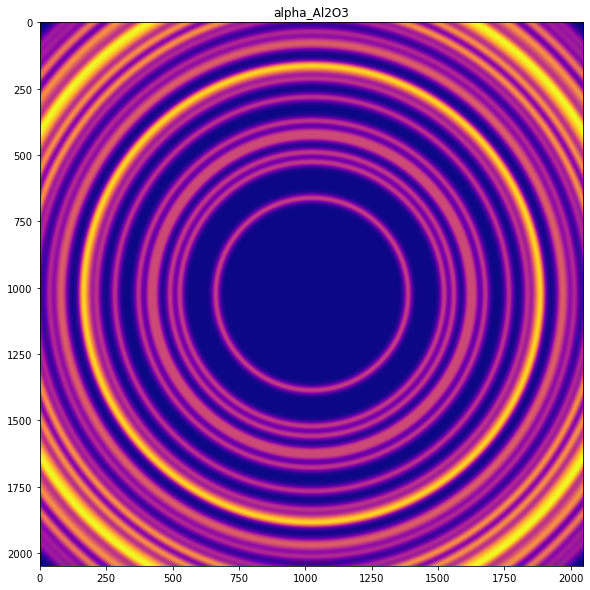

In [8]:
x = plot_calibration_image(.5, .5e-10, 'plasma')

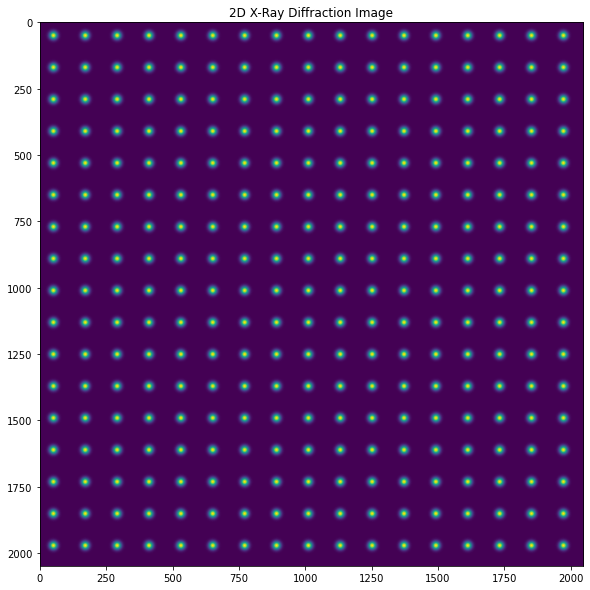

In [9]:
y = generate_2D_image(20,10,120, size = 100)

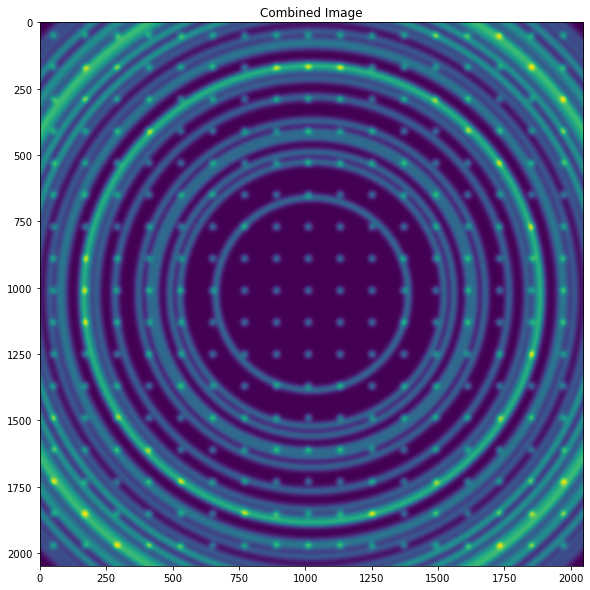

In [10]:
ci = combine_image(x,y)

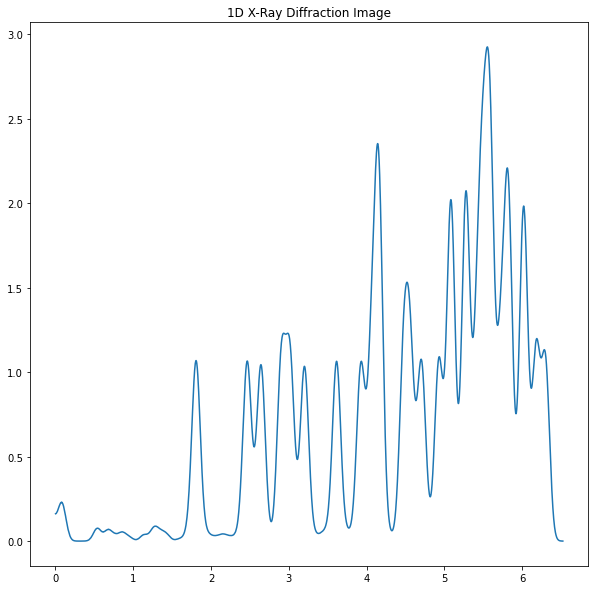

In [11]:
q, I = integrate_image(ci, .5, .5e-10, resolution = 3000)

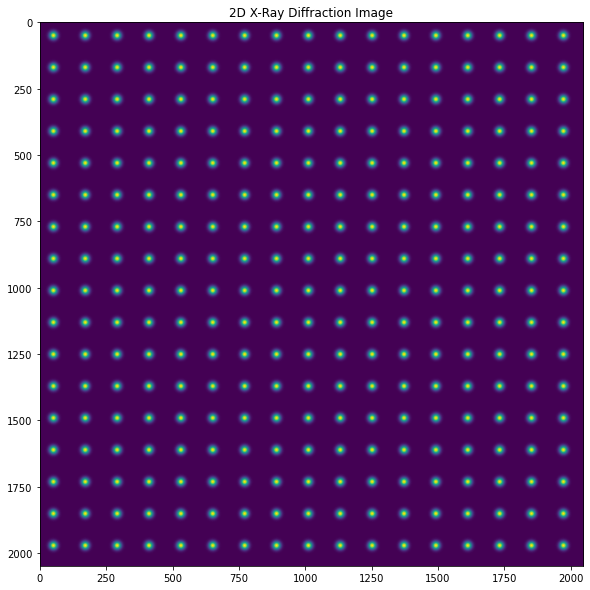

In [12]:
plain = generate_2D_image(20,10,120, size = 100)

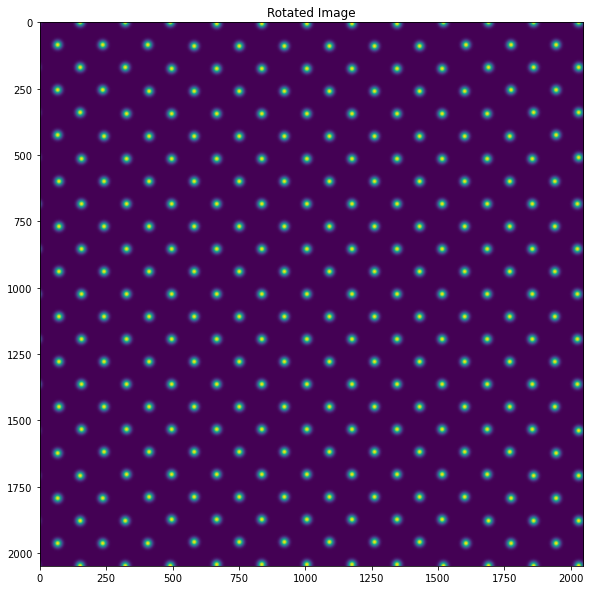

In [13]:
rotated = rotate_image(plain, 45)

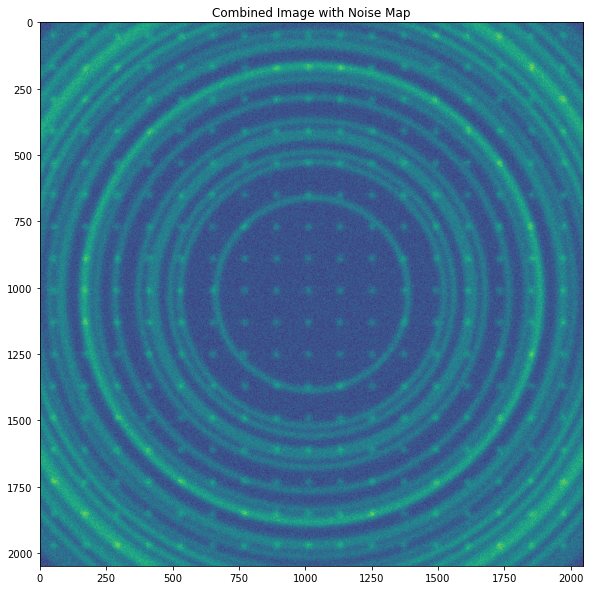

In [14]:
noisy_ci = generate_noisemap(ci, 3)

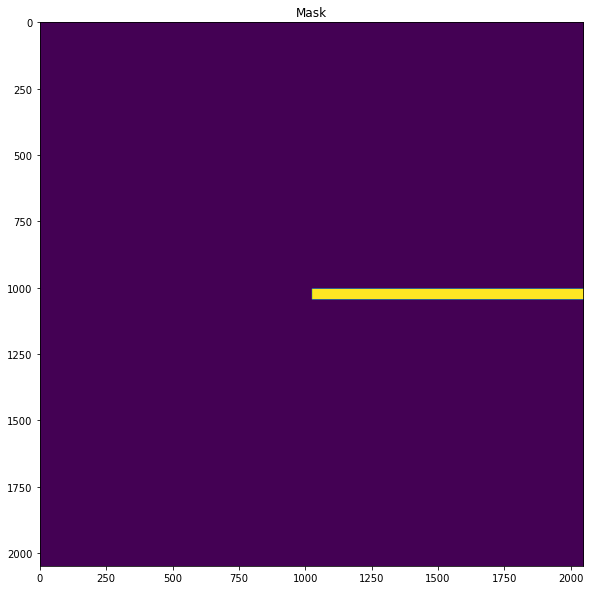

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
create_numpy_array_mask(ci, 20)

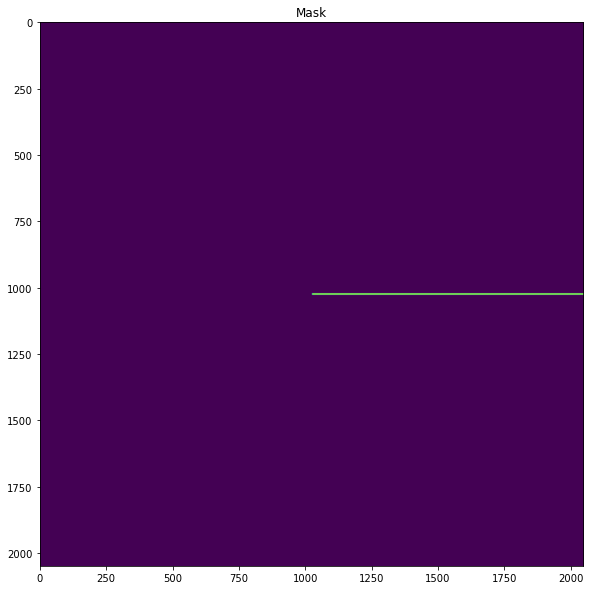

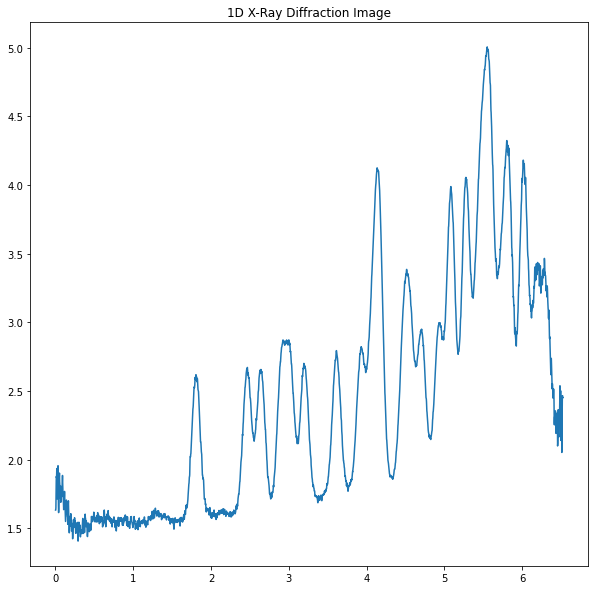

In [16]:
integration = integrate_image(noisy_ci, .5, .5e-10, resolution = 3000, mask = create_numpy_array_mask(ci, 3))

In [21]:
#create a rotation and integration function that takes the combined image, the mask, the distance, the wavelength, and the resolution of integration, and rotates the combined image
#by a user specified angle amount, if the angle specified is 1, the result will be 360 integrations of the combined image, each integration will be rotated by 1 degree
# the function will return a dataframe of the 1D integrations of the combined image

def rotate_and_integrate(combined_image, angle_of_rotation, distance, wavelength, resolution = 3000, mask = None):
    """
    This function takes the combined image, the mask, the distance, the wavelength, and the resolution of integration, and rotates the combined image by a user specified angle amount, if the angle specified is 1, the result will be 360 integrations of the combined image, each integration will be rotated by 1 degree.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
        angle_of_rotation (int): The angle of rotation.
        distance (float): The distance from the detector to the sample.
        wavelength (float): The wavelength of the x-rays.
        resolution (int): The resolution of the integration.
        mask (2D array): The mask to use for the integration.
    """
    
    import pandas as pd 
    
    #create a dataframe to store the 1D integrations
    df = pd.DataFrame()
    
    #create a loop that rotates the combined image by the user specified angle amount and integrates the image
    for i in range(0, 360, angle_of_rotation):
        #rotate the mask for the combined image
        rotated_mask = mask_rotation(mask, i)
        
        #integrate the rotated image
        q, I = integrate_image(combined_image, distance, wavelength, resolution, rotated_mask)
        
        #add the 1D integration to the dataframe
        df[i] = I
        
        #create a waterfall plot of the 1D integrations
    plt.figure(figsize=(10, 10))
    for i in range(0, 360, angle_of_rotation):
        plt.plot(q, df[i])
    plt.title("Waterfall Plot of 1D Integrations")
    plt.show()
        
    return df

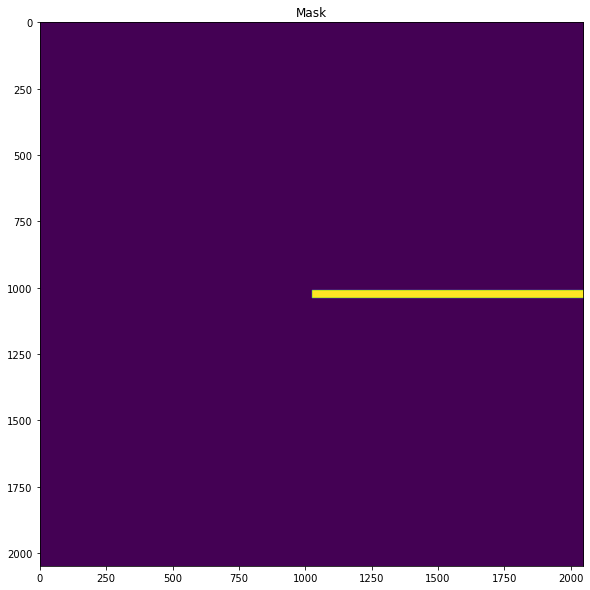

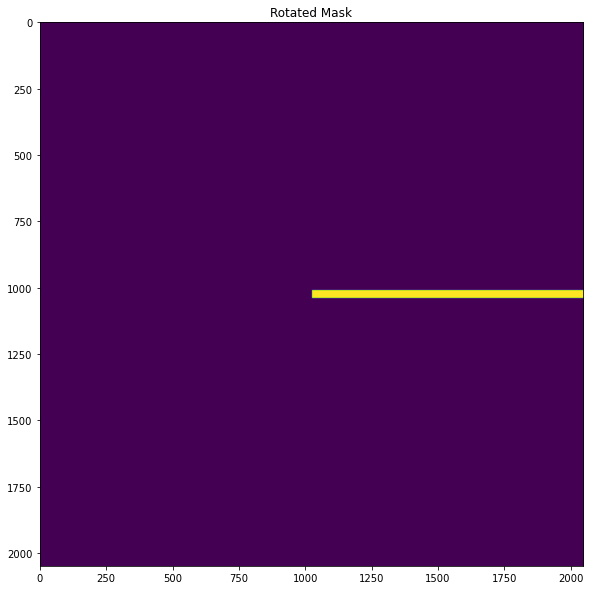

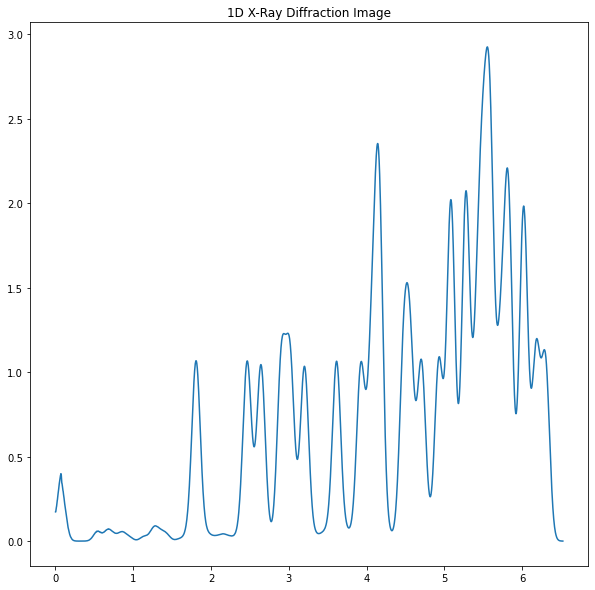

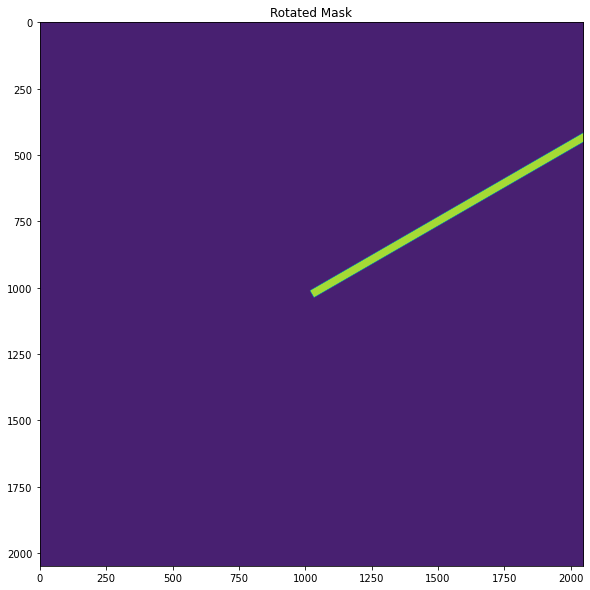

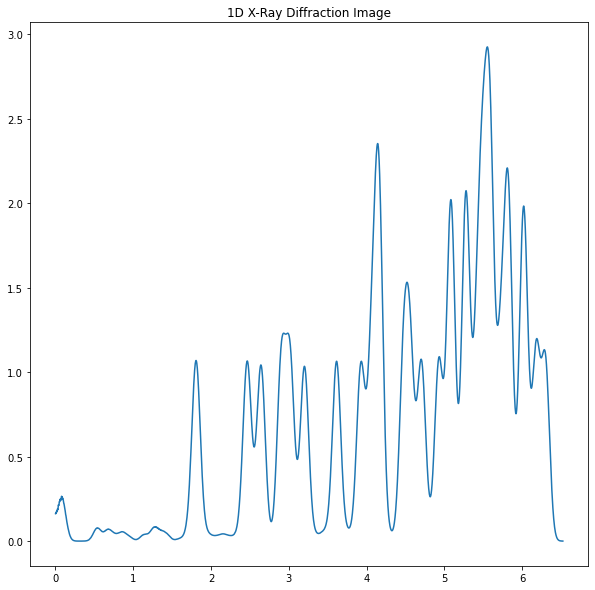

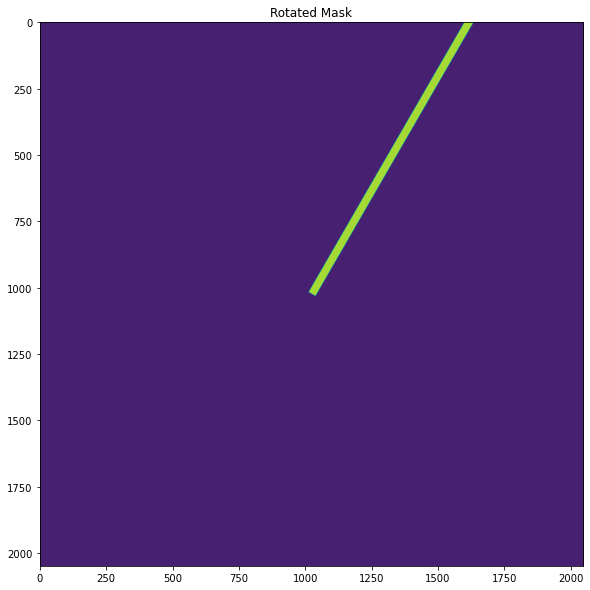

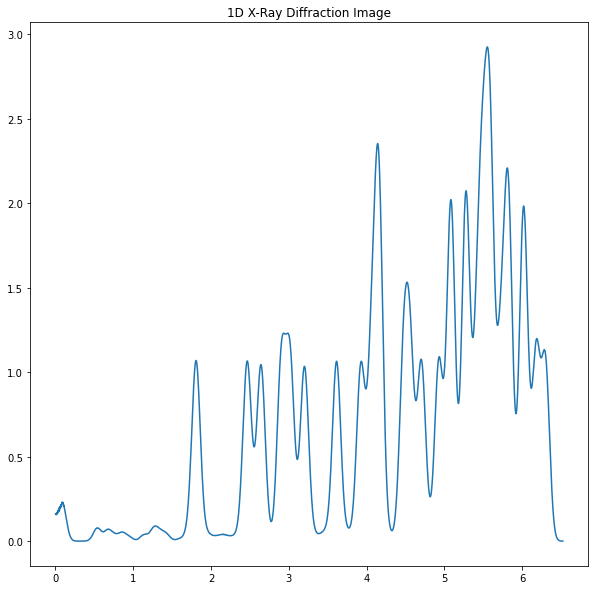

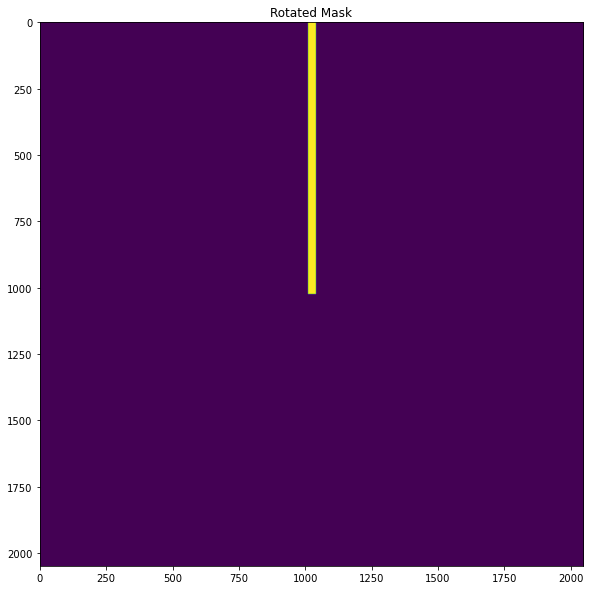

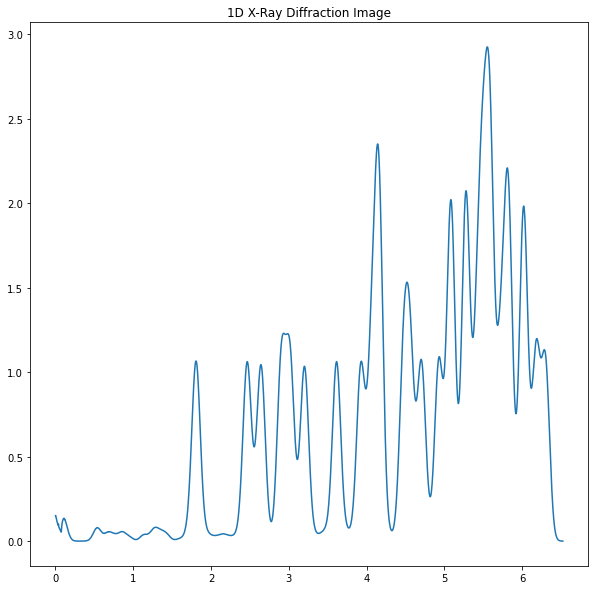

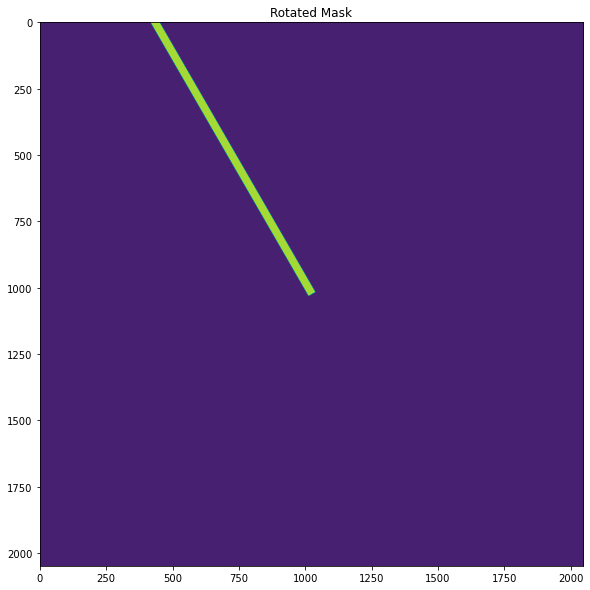

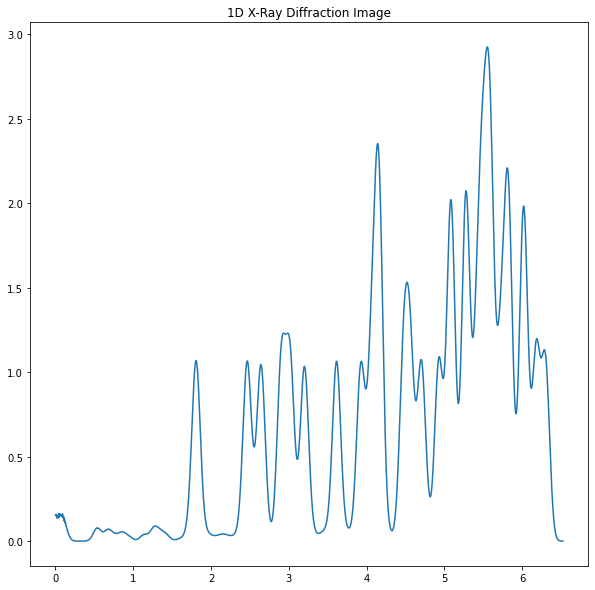

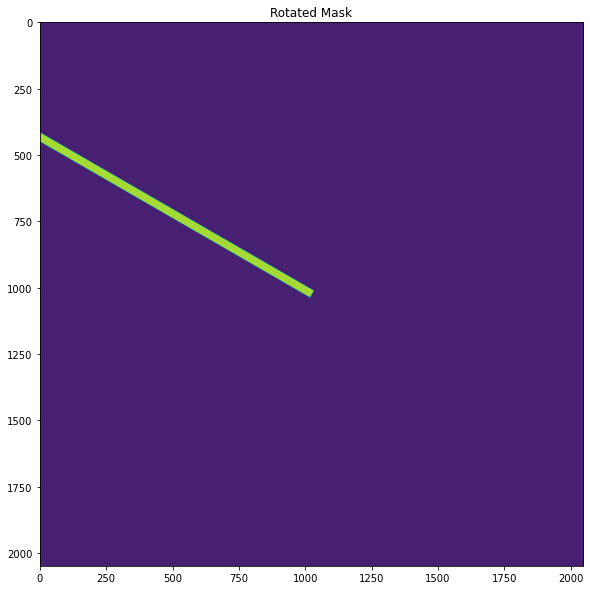

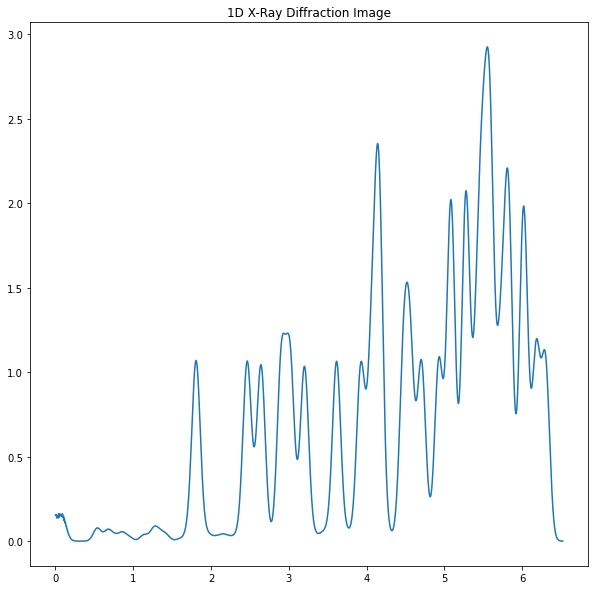

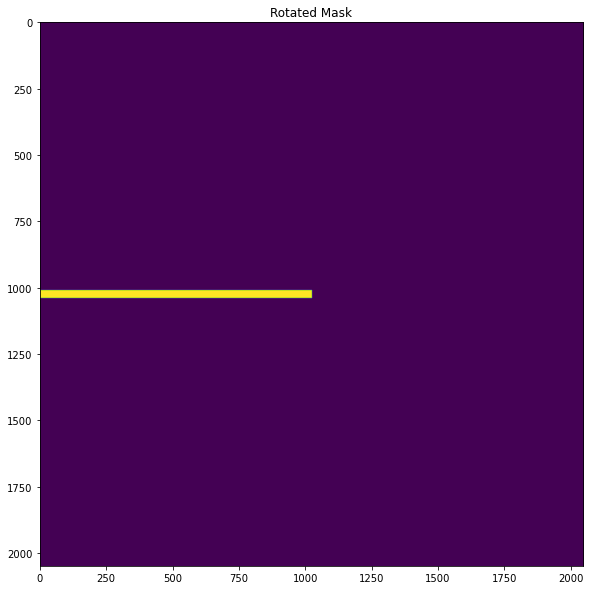

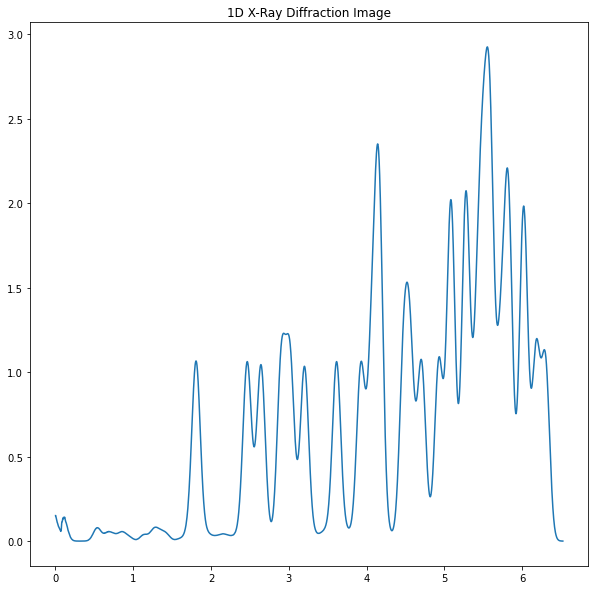

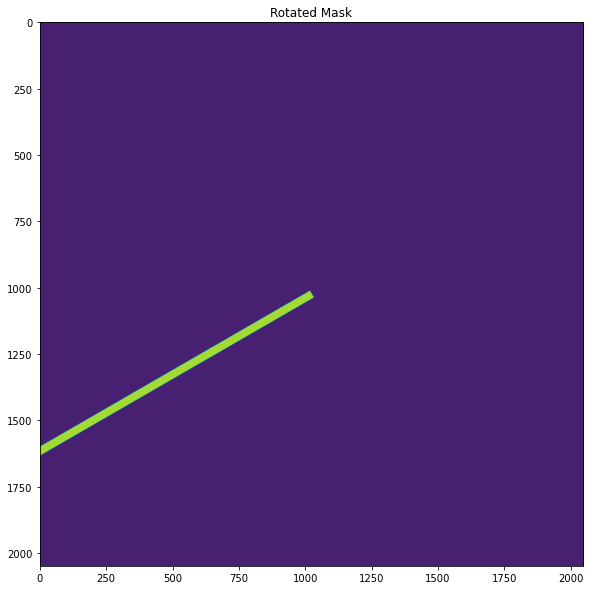

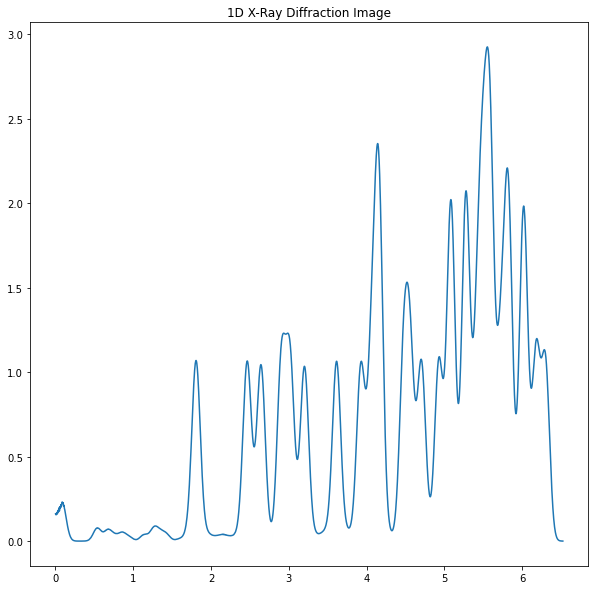

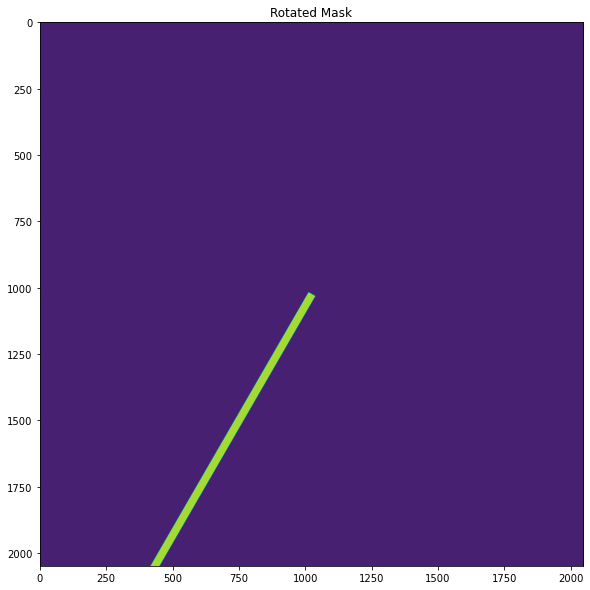

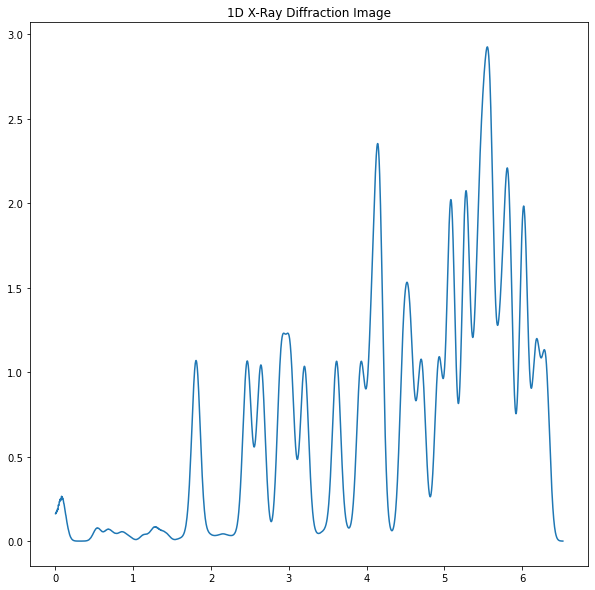

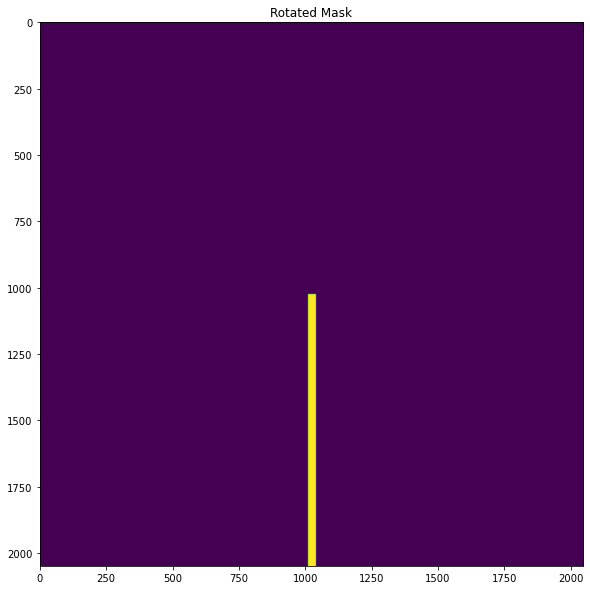

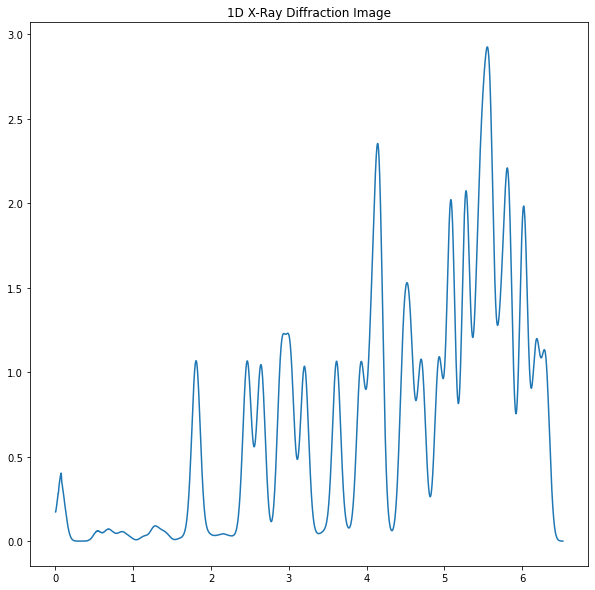

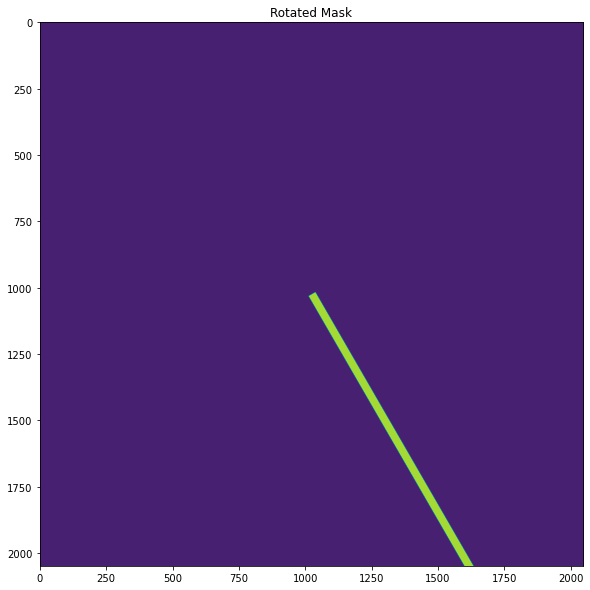

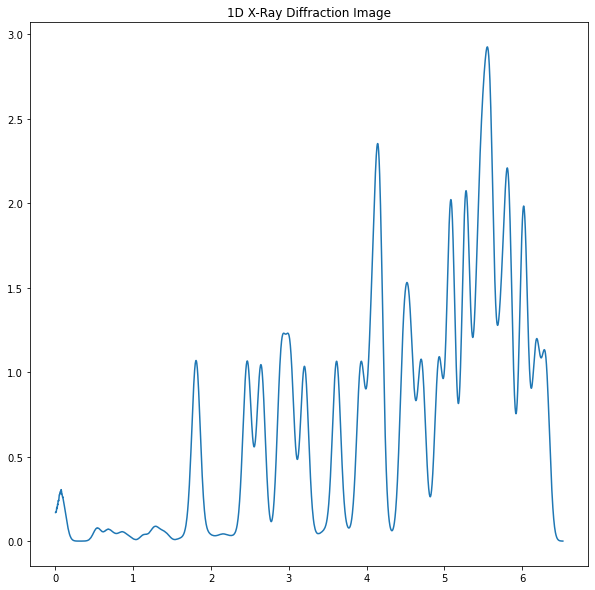

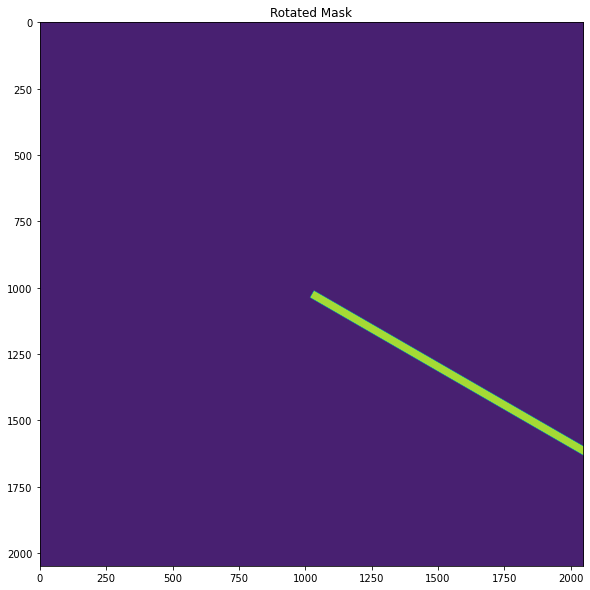

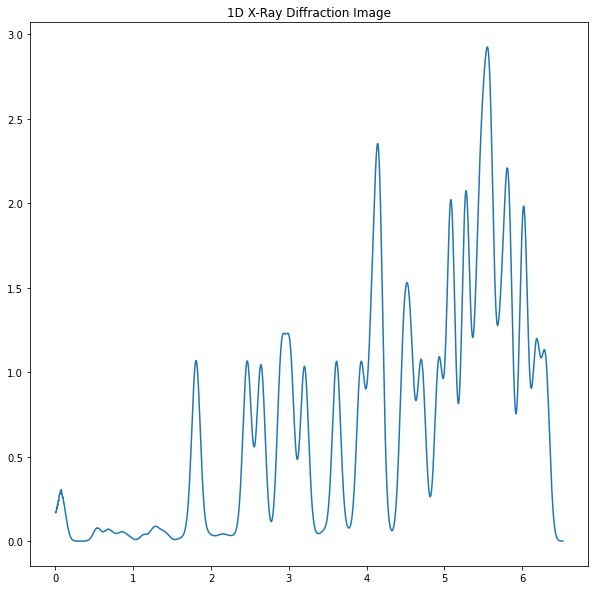

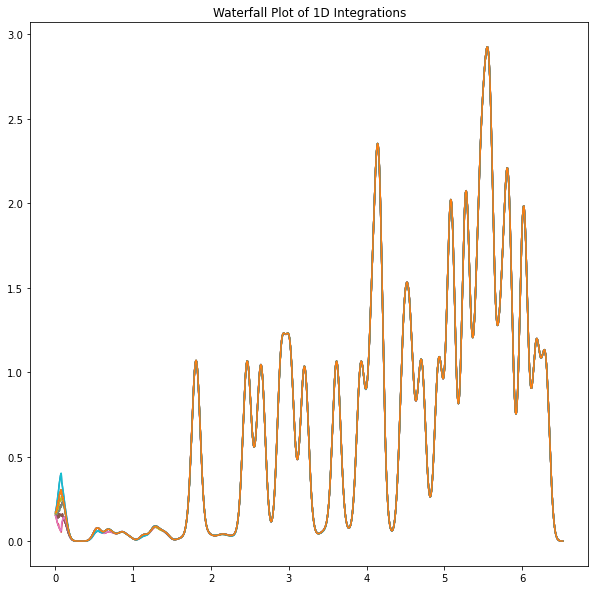

In [24]:
data = rotate_and_integrate(ci, 30, .5, .5e-10, resolution = 3000, mask = create_numpy_array_mask(ci, 15))

In [16]:
#create a function that rotates the create mask by a user specified angle amount, if the angle specified is 1, the result is that the mask is rotated by one degree
#it will return the rotated mask, the line should extend from the center of the image to the edge of the image
#this function does not use any previously created functions

import scipy.ndimage as ndimage

def mask_rotation(mask, angle):
    """
    This function rotates the create mask by a user specified angle amount, if the angle specified is 1, the result is that the mask is rotated by one degree.
    
    Parameters:
        mask (2D array): The mask to use for the integration.
        angle_of_rotation (int): The angle of rotation.
        """
    rotated_mask = ndimage.rotate(mask, angle, reshape = False, mode = 'mirror')
        
        
    #display the rotated mask
    plt.figure(figsize=(10, 10))
    plt.imshow(rotated_mask, cmap='viridis')
    plt.title("Rotated Mask")
    plt.show()
    
    return rotated_mask

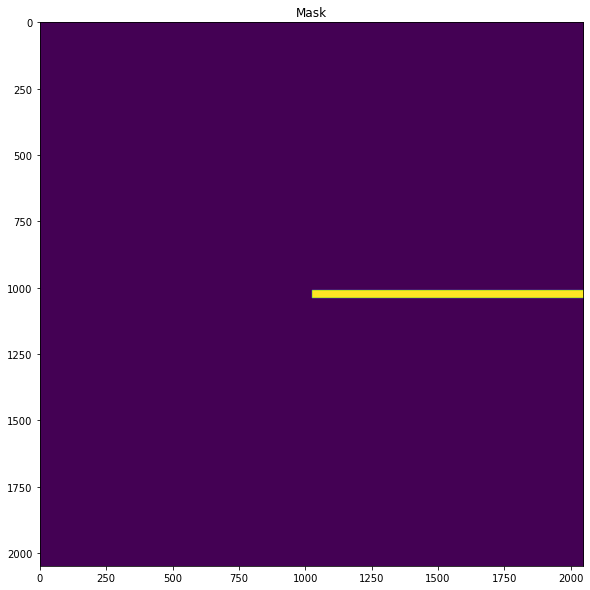

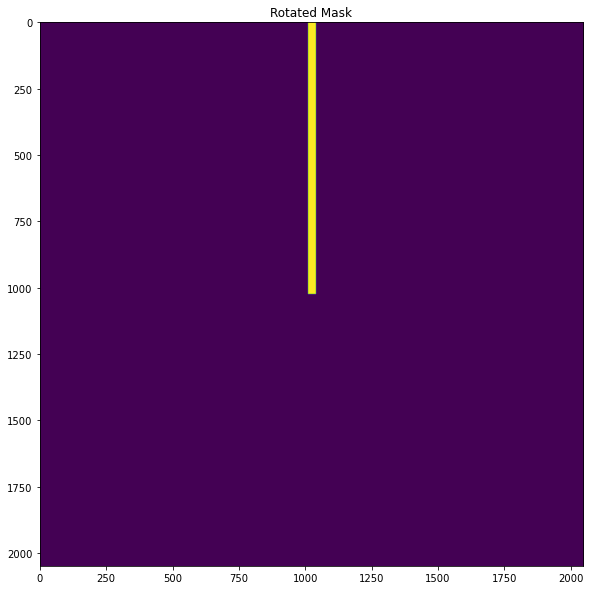

In [17]:
my_mask = create_numpy_array_mask(ci, 15)
rotated_make = mask_rotation(my_mask,90)